In [1]:
# cnn model
import keras
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
try: from sklearn.model_selection import train_test_split
except: from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
from sklearn import datasets
import sys
sys.path.insert(0,'..')

Using TensorFlow backend.


### Read the train & test and preprocessing

In [2]:
#Load the data, split into training/testing groups
d=datasets.load_digits()
X=d.data
Y=d.target

x_train, x_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.3, shuffle= True)
x_train_, x_test_, y_train_, y_test_ = x_train, x_test, y_train, y_test
# The known number of output classes.
num_classes = len(np.unique(y_train))
# Input image dimensions
input_shape = (X.shape[1],)

# Convert class vectors to binary class matrices. This uses 1 hot encoding.
y_train_binary = keras.utils.to_categorical(y_train, num_classes)
y_test_binary = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.reshape(x_train.shape[0], X.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], X.shape[1],1)

### Creation structure of CNN

In [3]:
# build CNN
def CNN_net():
    model = Sequential()
    
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X.shape[1],1)))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(X.shape[1]))
    model.add(Activation('relu'))
    
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    return model

In [4]:
# Parametres
verbose, epochs, batch_size = 1, 210, 1750
# initialize the model object
clf_cnn = CNN_net()
# fit network
history = clf_cnn.fit(x_train, y_train_binary, batch_size=batch_size,
          epochs=epochs, verbose=verbose, validation_data=(x_test, y_test_binary))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 1257 samples, validate on 540 samples
Epoch 1/210
1257/1257 [==============================] - 1s 804us/step - loss: 3.3079 - accuracy: 0.0883 - val_loss: 2.3877 - val_accuracy: 0.0833
Epoch 2/210
1257/1257 [==============================] - 0s 360us/step - loss: 2.8735 - accuracy: 0.1034 - val_loss: 2.3349 - val_accuracy: 0.0889
Epoch 3/210
1257/1257 [==============================] - 1s 411us/step - loss: 2.5973 - accuracy: 0.1154 - val_loss: 2.3065 - val_accuracy: 0.1296
Epoch 4/210
1257/1257 [==============================] - 0s 391us/step - loss: 2.4597 - accuracy: 0.1225 - val_loss: 2.2908 - val_accuracy: 0.1593
Epoch 5/210
1257/1257 [==============================] - 1s 407us/step - loss: 2.3822 - accuracy: 0.1177 - val_loss: 2.2843 - val_accuracy: 0.2148
Epoch 6/210
1257/1257 [==============================] - 1s 421us/step - loss: 2.3562 - accuracy: 0.1169 - val_loss: 2.2825 - val_accur

Epoch 51/210
1257/1257 [==============================] - 0s 356us/step - loss: 1.4414 - accuracy: 0.4845 - val_loss: 0.9059 - val_accuracy: 0.8444
Epoch 52/210
1257/1257 [==============================] - 0s 357us/step - loss: 1.4469 - accuracy: 0.4694 - val_loss: 0.8451 - val_accuracy: 0.8444
Epoch 53/210
1257/1257 [==============================] - 0s 359us/step - loss: 1.4065 - accuracy: 0.5012 - val_loss: 0.7907 - val_accuracy: 0.8481
Epoch 54/210
1257/1257 [==============================] - 0s 349us/step - loss: 1.3654 - accuracy: 0.5370 - val_loss: 0.7428 - val_accuracy: 0.8519
Epoch 55/210
1257/1257 [==============================] - 0s 380us/step - loss: 1.2940 - accuracy: 0.5632 - val_loss: 0.6988 - val_accuracy: 0.8593
Epoch 56/210
1257/1257 [==============================] - 0s 348us/step - loss: 1.2615 - accuracy: 0.5632 - val_loss: 0.6572 - val_accuracy: 0.8667
Epoch 57/210
1257/1257 [==============================] - 0s 359us/step - loss: 1.2295 - accuracy: 0.5792 - val_

Epoch 107/210
1257/1257 [==============================] - 1s 455us/step - loss: 0.4818 - accuracy: 0.8560 - val_loss: 0.1266 - val_accuracy: 0.9630
Epoch 108/210
1257/1257 [==============================] - 1s 457us/step - loss: 0.4383 - accuracy: 0.8679 - val_loss: 0.1269 - val_accuracy: 0.9630
Epoch 109/210
1257/1257 [==============================] - 1s 449us/step - loss: 0.4925 - accuracy: 0.8377 - val_loss: 0.1257 - val_accuracy: 0.9630
Epoch 110/210
1257/1257 [==============================] - 1s 434us/step - loss: 0.4405 - accuracy: 0.8536 - val_loss: 0.1237 - val_accuracy: 0.9648
Epoch 111/210
1257/1257 [==============================] - 1s 419us/step - loss: 0.4043 - accuracy: 0.8727 - val_loss: 0.1213 - val_accuracy: 0.9667
Epoch 112/210
1257/1257 [==============================] - 0s 395us/step - loss: 0.4173 - accuracy: 0.8616 - val_loss: 0.1186 - val_accuracy: 0.9704
Epoch 113/210
1257/1257 [==============================] - 0s 391us/step - loss: 0.4343 - accuracy: 0.8687

Epoch 162/210
1257/1257 [==============================] - 0s 348us/step - loss: 0.2951 - accuracy: 0.9109 - val_loss: 0.0632 - val_accuracy: 0.9852
Epoch 163/210
1257/1257 [==============================] - 0s 363us/step - loss: 0.2783 - accuracy: 0.9085 - val_loss: 0.0627 - val_accuracy: 0.9852
Epoch 164/210
1257/1257 [==============================] - 0s 349us/step - loss: 0.2800 - accuracy: 0.9014 - val_loss: 0.0622 - val_accuracy: 0.9833
Epoch 165/210
1257/1257 [==============================] - 0s 363us/step - loss: 0.2928 - accuracy: 0.9077 - val_loss: 0.0620 - val_accuracy: 0.9833
Epoch 166/210
1257/1257 [==============================] - 0s 362us/step - loss: 0.2481 - accuracy: 0.9212 - val_loss: 0.0618 - val_accuracy: 0.9833
Epoch 167/210
1257/1257 [==============================] - 0s 369us/step - loss: 0.2829 - accuracy: 0.9101 - val_loss: 0.0617 - val_accuracy: 0.9815
Epoch 168/210
1257/1257 [==============================] - 0s 377us/step - loss: 0.2657 - accuracy: 0.9157

In [5]:
# call predict to get predictions Report the accuracy
clf_cnn.evaluate(x_test, y_test_binary)

540/540 [==============================] - 0s 115us/step


[0.04769636881020334, 0.9870370626449585]

In [6]:
# call predict to get predictions
y_pred = clf_cnn.predict(x_test)
y_pred = np.round(y_pred)
from sklearn.metrics import accuracy_score
# Report the accuracy
accuracy_CNN = accuracy_score(y_test_binary, y_pred)
print("CNN : Accuracy: " + str(accuracy_CNN))

CNN : Accuracy: 0.9851851851851852


In [7]:
clf_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 62, 32)            128       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 60, 32)            3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 30, 32)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 28, 64)            6208      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 26, 64)            12352     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 13, 64)           

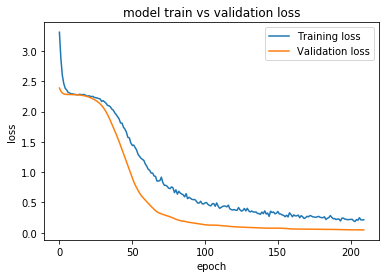

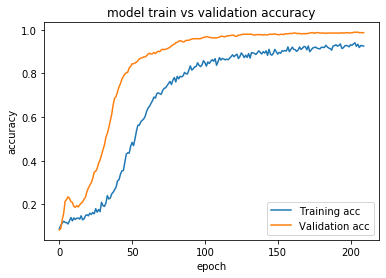

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss','Validation loss'], loc='best')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model train vs validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training acc','Validation acc'], loc='best')
plt.show()

### Testing the Novel Approach

### Feature Extraction by CNN

In [9]:
from keras.models import Model
# from the first Fully-Connected layer 
layer_name = 'dense_1'
intermediate_layer_model = Model(inputs=clf_cnn.input,
                                 outputs=clf_cnn.get_layer(layer_name).output)

In [10]:
# Save the features of the train dataset to use it in future.
out_cnn_train = intermediate_layer_model.predict(x_train)
# Save the features of the test dataset to use it in future.
out_cnn_test = intermediate_layer_model.predict(x_test)

In [11]:
print('Training Features (from CNN) Shape:', out_cnn_train.shape)
print('Training Labels (from CNN) Shape:', y_train.shape)

print('Test Features (from CNN) Shape:', out_cnn_test.shape)
print('Test Labels (from CNN) Shape:', y_test.shape)

Training Features (from CNN) Shape: (1257, 64)
Training Labels (from CNN) Shape: (1257,)
Test Features (from CNN) Shape: (540, 64)
Test Labels (from CNN) Shape: (540,)


### Classification by CNN + Random Forest + MLP

In [12]:
from djinn import djinn

print("djinn iris")    
modelname="class_djinn_iris"   # name the model
ntrees=3                 # number of trees = number of neural nets in ensemble
maxdepth=4               # max depth of tree -- optimize this for each data set
dropout_keep=1.0 

#initialize the model
model=djinn.DJINN_Classifier(ntrees,maxdepth,dropout_keep)


x_train, y_train, x_test, y_test = out_cnn_train, y_train, out_cnn_test, y_test 


# find optimal settings: this function returns dict with hyper-parameters
# each djinn function accepts random seeds for reproducible behavior
# optimal=model.get_hyperparameters(x_train, y_train, random_state=1)
# batchsize=optimal['batch_size']
# learnrate=optimal['learn_rate']
#epochs=optimal['epochs']

epochs=580
learnrate=0.004
batchsize=63


# epochs=200
# learnrate=0.003
# batchsize=32
# train the model with hyperparameters determined above
model.train(x_train,y_train,epochs=epochs,learn_rate=learnrate, batch_size=batchsize, 
              display_step=1, save_files=True, file_name=modelname, 
              save_model=True,model_name=modelname, random_state=1)

# *note there is a function model.fit(x_train,y_train, ... ) that wraps 
# get_hyperparameters() and train(), so that you do not have to manually
# pass hyperparameters to train(). However, get_hyperparameters() can
# be expensive, so I recommend running it once per dataset and using those
# hyperparameter values in train() to save computational time
# make predictions
m=model.predict(x_test) #returns the median prediction if more than one tree

import sklearn
#evaluate results
acc=sklearn.metrics.accuracy_score(y_test,m.flatten())  
#close model 
model.close_model()

djinn iris




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





Epoch: 0001 cost= 2.235153381 accuracy= 0.211
Epoch: 0002 cost= 1.991475919 accuracy= 0.241
Epoch: 0003 cost= 1.925601882 accuracy= 0.320
Epoch: 0004 cost= 1.765781010 accuracy= 0.332
Epoch: 0005 cost= 1.546210703 accuracy= 0.370
Epoch: 0006 cost= 1.424424753 accuracy= 0.478
Epoch: 0007 cost= 1.333667699 accur

Epoch: 0125 cost= 0.068710428 accuracy= 0.958
Epoch: 0126 cost= 0.088246424 accuracy= 0.984
Epoch: 0127 cost= 0.034608884 accuracy= 0.988
Epoch: 0128 cost= 0.051037873 accuracy= 0.996
Epoch: 0129 cost= 0.013150534 accuracy= 0.992
Epoch: 0130 cost= 0.020054810 accuracy= 0.997
Epoch: 0131 cost= 0.008173767 accuracy= 0.996
Epoch: 0132 cost= 0.002684931 accuracy= 0.999
Epoch: 0133 cost= 0.001808657 accuracy= 0.998
Epoch: 0134 cost= 0.008957625 accuracy= 1.000
Epoch: 0135 cost= 0.006157279 accuracy= 1.000
Epoch: 0136 cost= 0.002336000 accuracy= 0.997
Epoch: 0137 cost= 0.006455984 accuracy= 0.998
Epoch: 0138 cost= 0.001929199 accuracy= 0.999
Epoch: 0139 cost= 0.004485132 accuracy= 1.000
Epoch: 0140 cost= 0.001596343 accuracy= 0.999
Epoch: 0141 cost= 0.002334930 accuracy= 0.997
Epoch: 0142 cost= 0.005478027 accuracy= 0.999
Epoch: 0143 cost= 0.006126069 accuracy= 0.998
Epoch: 0144 cost= 0.005601927 accuracy= 0.999
Epoch: 0145 cost= 0.002007980 accuracy= 0.999
Epoch: 0146 cost= 0.001605325 accu

Epoch: 0304 cost= 0.000095530 accuracy= 1.000
Epoch: 0305 cost= 0.000088224 accuracy= 1.000
Epoch: 0306 cost= 0.000080109 accuracy= 1.000
Epoch: 0307 cost= 0.000078637 accuracy= 1.000
Epoch: 0308 cost= 0.000091691 accuracy= 1.000
Epoch: 0309 cost= 0.000073209 accuracy= 1.000
Epoch: 0310 cost= 0.000082071 accuracy= 1.000
Epoch: 0311 cost= 0.000120115 accuracy= 1.000
Epoch: 0312 cost= 0.000073625 accuracy= 1.000
Epoch: 0313 cost= 0.000085401 accuracy= 1.000
Epoch: 0314 cost= 0.000063744 accuracy= 1.000
Epoch: 0315 cost= 0.000075384 accuracy= 1.000
Epoch: 0316 cost= 0.000094087 accuracy= 1.000
Epoch: 0317 cost= 0.000100812 accuracy= 1.000
Epoch: 0318 cost= 0.000072175 accuracy= 1.000
Epoch: 0319 cost= 0.000092579 accuracy= 1.000
Epoch: 0320 cost= 0.000047397 accuracy= 1.000
Epoch: 0321 cost= 0.000082754 accuracy= 1.000
Epoch: 0322 cost= 0.000066783 accuracy= 1.000
Epoch: 0323 cost= 0.000058200 accuracy= 1.000
Epoch: 0324 cost= 0.000058969 accuracy= 1.000
Epoch: 0325 cost= 0.000079495 accu

Epoch: 0081 cost= 0.030334534 accuracy= 0.985
Epoch: 0082 cost= 0.031173310 accuracy= 0.995
Epoch: 0083 cost= 0.019708162 accuracy= 0.993
Epoch: 0084 cost= 0.020842355 accuracy= 0.996
Epoch: 0085 cost= 0.024087327 accuracy= 0.996
Epoch: 0086 cost= 0.020577075 accuracy= 0.989
Epoch: 0087 cost= 0.029267613 accuracy= 0.980
Epoch: 0088 cost= 0.038020339 accuracy= 0.988
Epoch: 0089 cost= 0.032178161 accuracy= 0.993
Epoch: 0090 cost= 0.025620140 accuracy= 0.993
Epoch: 0091 cost= 0.019457055 accuracy= 0.995
Epoch: 0092 cost= 0.019503403 accuracy= 0.996
Epoch: 0093 cost= 0.026218680 accuracy= 0.993
Epoch: 0094 cost= 0.018543471 accuracy= 0.992
Epoch: 0095 cost= 0.017001266 accuracy= 0.996
Epoch: 0096 cost= 0.017768013 accuracy= 0.997
Epoch: 0097 cost= 0.009681985 accuracy= 0.998
Epoch: 0098 cost= 0.009509851 accuracy= 0.997
Epoch: 0099 cost= 0.015690863 accuracy= 0.997
Epoch: 0100 cost= 0.020188091 accuracy= 0.989
Epoch: 0101 cost= 0.036824376 accuracy= 0.977
Epoch: 0102 cost= 0.022249876 accu

Epoch: 0261 cost= 0.000159404 accuracy= 1.000
Epoch: 0262 cost= 0.000159401 accuracy= 1.000
Epoch: 0263 cost= 0.000157788 accuracy= 1.000
Epoch: 0264 cost= 0.000090980 accuracy= 1.000
Epoch: 0265 cost= 0.000093446 accuracy= 1.000
Epoch: 0266 cost= 0.000109696 accuracy= 1.000
Epoch: 0267 cost= 0.000216971 accuracy= 1.000
Epoch: 0268 cost= 0.000370797 accuracy= 1.000
Epoch: 0269 cost= 0.000104849 accuracy= 1.000
Epoch: 0270 cost= 0.000115924 accuracy= 1.000
Epoch: 0271 cost= 0.000152691 accuracy= 1.000
Epoch: 0272 cost= 0.000145250 accuracy= 1.000
Epoch: 0273 cost= 0.000100315 accuracy= 1.000
Epoch: 0274 cost= 0.000179001 accuracy= 1.000
Epoch: 0275 cost= 0.000121071 accuracy= 1.000
Epoch: 0276 cost= 0.000119583 accuracy= 1.000
Epoch: 0277 cost= 0.000131936 accuracy= 1.000
Epoch: 0278 cost= 0.000099089 accuracy= 1.000
Epoch: 0279 cost= 0.000134469 accuracy= 1.000
Epoch: 0280 cost= 0.000107119 accuracy= 1.000
Epoch: 0281 cost= 0.000112624 accuracy= 1.000
Epoch: 0282 cost= 0.000075856 accu

Epoch: 0038 cost= 0.108406350 accuracy= 0.974
Epoch: 0039 cost= 0.113780195 accuracy= 0.962
Epoch: 0040 cost= 0.122081064 accuracy= 0.972
Epoch: 0041 cost= 0.113794649 accuracy= 0.973
Epoch: 0042 cost= 0.100959270 accuracy= 0.973
Epoch: 0043 cost= 0.080163239 accuracy= 0.969
Epoch: 0044 cost= 0.070631605 accuracy= 0.976
Epoch: 0045 cost= 0.078362025 accuracy= 0.964
Epoch: 0046 cost= 0.090262516 accuracy= 0.972
Epoch: 0047 cost= 0.088807422 accuracy= 0.979
Epoch: 0048 cost= 0.092586083 accuracy= 0.966
Epoch: 0049 cost= 0.073300653 accuracy= 0.968
Epoch: 0050 cost= 0.064146541 accuracy= 0.979
Epoch: 0051 cost= 0.079622039 accuracy= 0.981
Epoch: 0052 cost= 0.065915951 accuracy= 0.982
Epoch: 0053 cost= 0.045730489 accuracy= 0.981
Epoch: 0054 cost= 0.039485552 accuracy= 0.981
Epoch: 0055 cost= 0.061620996 accuracy= 0.957
Epoch: 0056 cost= 0.098213105 accuracy= 0.974
Epoch: 0057 cost= 0.105397672 accuracy= 0.964
Epoch: 0058 cost= 0.079363908 accuracy= 0.979
Epoch: 0059 cost= 0.065224501 accu

Epoch: 0396 cost= 0.003476316 accuracy= 0.999
Epoch: 0397 cost= 0.001689455 accuracy= 1.000
Epoch: 0398 cost= 0.002593806 accuracy= 0.999
Epoch: 0399 cost= 0.003668959 accuracy= 0.999
Epoch: 0400 cost= 0.004394409 accuracy= 0.999
Epoch: 0401 cost= 0.025071883 accuracy= 0.977
Epoch: 0402 cost= 0.052694263 accuracy= 0.991
Epoch: 0403 cost= 0.017772809 accuracy= 0.996
Epoch: 0404 cost= 0.009362807 accuracy= 0.997
Epoch: 0405 cost= 0.009849513 accuracy= 0.999
Epoch: 0406 cost= 0.002168619 accuracy= 0.999
Epoch: 0407 cost= 0.000951588 accuracy= 0.999
Epoch: 0408 cost= 0.000397193 accuracy= 0.999
Epoch: 0409 cost= 0.000331840 accuracy= 0.999
Epoch: 0410 cost= 0.007705299 accuracy= 0.999
Epoch: 0411 cost= 0.000670383 accuracy= 0.999
Epoch: 0412 cost= 0.005287572 accuracy= 0.999
Epoch: 0413 cost= 0.001384544 accuracy= 1.000
Epoch: 0414 cost= 0.003498717 accuracy= 1.000
Epoch: 0415 cost= 0.000851346 accuracy= 0.999
Epoch: 0416 cost= 0.002517601 accuracy= 1.000
Epoch: 0417 cost= 0.000394904 accu

Epoch: 0577 cost= 0.000039521 accuracy= 1.000
Epoch: 0578 cost= 0.000029428 accuracy= 1.000
Epoch: 0579 cost= 0.000024329 accuracy= 1.000
Epoch: 0580 cost= 0.000031708 accuracy= 1.000
Optimization Finished!
Model saved in: ./class_djinn_iris_tree2.ckpt

INFO:tensorflow:Restoring parameters from ./class_djinn_iris_tree0.ckpt
Model 0 restored
INFO:tensorflow:Restoring parameters from ./class_djinn_iris_tree1.ckpt
Model 1 restored
INFO:tensorflow:Restoring parameters from ./class_djinn_iris_tree2.ckpt
Model 2 restored
(3, 540, 10)


### Classification by CNN + ( SVM, XGB, DTree, ExtraTrees, RandomFores)


In [13]:
#Feed the extracted features with the labels to RANDOM FOREST 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(out_cnn_train, y_train)
#Feed the features of the test to Random Forest Classifier to predict its class
predictions = rf.predict(out_cnn_test)
accuracy_CNN_RF=accuracy_score(predictions , y_test)
#print('CNN+RF : Accuracy:', accuracy_CNN_RF, '%.')

from sklearn.ensemble import ExtraTreesClassifier
Ext = ExtraTreesClassifier(n_estimators=100)
Ext.fit(out_cnn_train, y_train)
#Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
predictions = Ext.predict(out_cnn_test)
accuracy_CNN_Ext=accuracy_score(predictions , y_test)
#print('CNN+Extrat : Accuracy:', accuracy_CNN_Ext, '%.')


#Applying SVC (Support Vector Classification)
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(out_cnn_train, y_train)
#print('The accuracy of the SVM classifier on training data is {:.4f}'.format(svm.score(x_train, y_train)))


#Applying XGBoost
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(out_cnn_train, y_train)
#print('The accuracy of the XGBoost classifier on training data is {:.4f}'.format(xgb_clf.score(x_train, y_train)))


#Applying Decision Tree
from sklearn import tree
#Create tree object
decision_tree = tree.DecisionTreeClassifier()
#Train DT based on scaled training set
decision_tree.fit(out_cnn_train, y_train)
#Print performance
#print('The accuracy of the Decision Tree classifier on training data is {:.4f}'.format(decision_tree.score(x_train, y_train)))


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with the best KNN model
# This will allow us to get a better results
cx_train = np.concatenate((x_train, x_test), 0)
cy_train = np.concatenate((y_train, y_test), 0)

### Classification by RandomForest, ExtraTrees

In [15]:
# RandomForestClassifier : from dataset originl
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_, y_train_)
predictions = rf.predict(x_test_)
accuracy_RF=accuracy_score(predictions , y_test_)
#print('RF : Accuracy:', accuracy_RF, '%.')

# ExtraTreesClassifier : from dataset originl
Extra = ExtraTreesClassifier(n_estimators=100)
Extra.fit(x_train_, y_train_)
predictions = Extra.predict(x_test_)
accuracy_Extra=accuracy_score(predictions , y_test_)
#print('Extra : Accuracy:', accuracy_Extra, '%.')

###  Score

In [16]:
print('Accuracy RF          ::',  "{:.4f}".format(accuracy_RF),'%.')
print('Accuracy Extrat      ::',  "{:.4f}".format(accuracy_Extra),'%.')
print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
print('Accuracy CNN         ::',  "{:.4f}".format(accuracy_CNN), '%.')
print('Accuracy CNN+RF      ::',  "{:.4f}".format(accuracy_CNN_RF), '%.')
print('Accuracy CNN+Extrat  ::',  "{:.4f}".format(accuracy_CNN_Ext), '%.')
print('Accuracy CNN+SVM     :: {:.4f}'.format(svm.score(x_test, y_test)),'%.')
print('Accuracy CNN+XGBoost :: {:.4f}'.format(xgb_clf.score(x_test, y_test)),'%.')
print('Accuracy CNN+DTree   :: {:.4f}'.format(decision_tree.score(x_test, y_test)),'%.')
print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
print('Accuracy CNN+RF+MLP  ::',  "{:.4f}".format(acc),'%.')
print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
print('Accuracy CNN+SVM using cv=10     :: {:.4f}' .format(cross_val_score(svm, cx_train, cy_train, cv=10, scoring='accuracy').mean()),'%.')
print('Accuracy CNN+rf  using cv=10     :: {:.4f}' .format(cross_val_score(rf, cx_train, cy_train, cv=10, scoring='accuracy').mean() ),'%.')
print('Accuracy CNN+XGBoost using cv=10 :: {:.4f}'.format(cross_val_score(xgb_clf, cx_train, cy_train, cv=10, scoring='accuracy').mean() ),'%.')

Accuracy RF          :: 0.9815 %.
Accuracy Extrat      :: 0.9796 %.
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Accuracy CNN         :: 0.9852 %.
Accuracy CNN+RF      :: 0.9833 %.
Accuracy CNN+Extrat  :: 0.9889 %.
Accuracy CNN+SVM     :: 0.3981 %.
Accuracy CNN+XGBoost :: 0.9722 %.
Accuracy CNN+DTree   :: 0.9630 %.
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Accuracy CNN+RF+MLP  :: 0.9796 %.
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Accuracy CNN+SVM using cv=10     :: 0.5876 %.
Accuracy CNN+rf  using cv=10     :: 0.9872 %.
Accuracy CNN+XGBoost using cv=10 :: 0.9805 %.


In [ ]:
#https://datascience.stackexchange.com/questions/38957/keras-conv1d-for-simple-data-target-prediction